In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import lognorm

In [2]:
np.random.seed=1234

# Metropolis Hastings Algorithm

Metropolis Hastings algorith is the standard MCMC algorithm. 
it uses a simpler proposal distribution to navigate and sample from a complex distribution.

### MH algorithm


\Input{$\pi$,$\mathbf{x}_{0}$, $\mathbf{C} $, N}
 
 **For**{$n =1,2,3 \cdots N$
 > draw a candidate state ~ $\mathbf{x}^* =  q(\mathbf{x}_{n+1} | \mathbf{x}_n)$  $\sim \mathcal{N}(\mathbf{m}, \mathbf{C})$\\

>compute acceptance criteria  $\alpha(\mathbf{x}_{n}, \mathbf{x}^*) =  min \left\lbrace   1, \dfrac{ \pi(\mathbf{x}^* ) } {\pi(\mathbf{x}_{n} ) }\right\rbrace $\\

>draw ~$ u \sim  U_{\left[ 0,1\right] }$\\

>**If **$u < \alpha(\mathbf{x}_{n}, x^*) $ 
       
>>$ \mathbf{x}_{n+1}=\mathbf{x}^* $ 

>**else**
>>$ \mathbf{x}_{n+1}=\mathbf{x}_n $
    


## Part 1: Sysmmetric Invariant(target) distribution

We first look at the ase where the traget distibution and the proposal distribution are symetric.

**Gaussian distribution** is sysmmetric in nature. We can therefor use a simplified MH acceptance criteria.  



Suppose we use **standard Metropolis**, with symmetric proposal

$$
x^* = x + U(-\Delta,\Delta)
$$

This implies that the probability of choosing something in the interval $[x^*, x^* + dx]$, when we are at $x$ is:

$$q(x^* ; x) = \frac{dx}{2\Delta}$$

 while the probability that $x$ is the interval $[x, x + dx]$ when we are at $x^*$ is given by

$$q(x ; x^*) = \frac{dx}{2\Delta}= q( x^* ; x) $$

The two probabilities cancels out, hence the standard acceptance criteria for the **symmetric** is 


$$\alpha_{MH}(\mathbf{x}^{*}; \mathbf{x}_{n} ) =  \min \left\lbrace   1, \dfrac{ \pi(\mathbf{x}^* ) 
} {\pi(\mathbf{x}_{n}) }\right\rbrace $$

While that for **assymetric proposal distrubution** is 

$$\alpha_{MH}(\mathbf{x}^{*}; \mathbf{x}_{n} ) =  \min \left\lbrace   1, \dfrac{ \pi(\mathbf{x}^* ) 
q(\mathbf{x}_n ; \mathbf{x}^*)} {\pi(\mathbf{x}_{n})  q(\mathbf{x}^{*} ; \mathbf{x}_n)}\right\rbrace $$

# Symmetric Proposal

**Gaussian distribution** is sysmmetric in nature. We can therefor use a simplified MH acceptance criteria.  

We look at the perfomance of a uniform distribution with diferent parameters and how the tails of the log normal distribition will be sampled. Note that log-normal distribution is assymetric in nature. 
These are :

1) We use the Uniform distribution  $U(- \Delta, \Delta)$ where $\Delta=2$

2)  We use the Uniform distribution  $U(- \Delta, \Delta)$ where $\Delta=5$


In [3]:
def proposal_distribution_symmetric(delta):
    proposal = np.random.uniform(-delta, delta)  
    return proposal

# Target 
We use a **log-normal** distribution with parametres $\sigma = 0.75$ and $\mu = 2.0$

In [4]:
def target_distribution(x, mu=2.0, sigma=.75):
    frozen_lognormal= lognorm(s=sigma, scale = np.exp(mu))
    return frozen_lognormal.pdf(x)


# MH decision for Symmetric distribution


The MH acceptance criteria for symmetric target distribution is given as 

$$
\frac{q(x^* ; x)}{q(x ; x^*)} = \frac{\pi(x^*)}{\pi(x)}
$$


where $\pi$ is the target distribution. 
 
The candidate state $x^*$ will always be accepted if we can find an when the probability density of the proposed candidate is higher than that of the current state. This ensures that the sampler stays longer in regions of high probability density. 

In [5]:
def MH_decision_symmetric(current, proposed, pdf):
    # 'accepted_p' includes the case where p_proposed > p_current since u,
    # a random number between 0 and 1, is always less than the ratio p_proposed/p_current
   
    p_current, p_proposed = pdf(current), pdf(proposed)
    ratio = p_proposed/p_current
    
    if ratio >=1:
        return True
    else:
        u = np.random.uniform(0,1)
        return u <=ratio

# Generate a candidate

We generate a candidate point $x^* = x + U(\Delta,-\Delta)$. 

In [6]:
def generate_symmetric_candidate(current,delta):
    proposed_delta =  proposal_distribution_symmetric(delta)
    return current + proposed_delta

# MH Sampler
 We run a number of iterations and making a decision whether to accept of reject a proposed candidate. If the candidate is accepted, we move to the candidate state, otherwise we remain in the previous state. 

In [7]:
def MH_sampler(target_pdf,initial_state, N=5000, symmetric=True,delta=None, rho=None,proposal_pdf=None):
    '''INPUT: 1) target distribution
              2) initiat_state in the state space
              3) delta value for the proposal disribution
              4) the number of iterations that will be perfomed.'''
    '''OUTPUT: data storage for the samples that were accepted'''
    
    current = initial_state
    number_of_accepted_samples=0
    samples = []
    
    if symmetric:
        poposed_pdf = generate_symmetric_candidate
        accept_criteria = MH_decision_symmetric
    else:
        poposed_pdf = asymmetric_proposal_distribution
        accept_criteria = MH_decision_asymmetric

    #start the iterartions
    for n in range(0, N):
        proposed = generate_symmetric_candidate(current,delta)
        accepted = MH_decision_symmetric(current, proposed, target_pdf)
        if accepted:
            current = proposed
            number_of_accepted_samples+=1
        else:# The else clause is redundant but added for readability.
            current = current
        samples.append(current)
    print("The percentage of accepted samples is :", format(number_of_accepted_samples/N*100, '.2f'), "%" )       
    return samples

# Set the parameters

# Run the Symmetric sampler

In [8]:
## Set parameters
N=10_000
target_pdf = target_distribution


In [9]:
#initial_state=proposal_distribution_symmetric(delta)
ds_symmetric_delta2 = MH_sampler(target_pdf=target_distribution, 
                                    initial_state=2, delta=2, N=1000,symmetric=True)
ds_symmetric_delta5 = MH_sampler(target_pdf=target_distribution, 
                                    initial_state=2, delta=5, N=1000,symmetric=True)

The percentage of accepted samples is : 89.00 %
The percentage of accepted samples is : 77.50 %


# Plot the target and the histogram

In [10]:
def plot_samples(target_vals_delta, delta,symmetric=True):
    '''
    Received  targets values
    returns fig for histogram and target pdf
    '''
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    x_vals = np.linspace(0,80,num=100)
    target_vals = [target_distribution(x) for x in x_vals]

    ax.plot(x_vals,target_vals, color='r')
    plt.hist(target_vals_delta,x_vals,facecolor='green',density=True, edgecolor='black', linewidth=1.2)
    
    ax.set_xlabel("$X$")
    ax.set_ylabel("$\pi(x)$")
    ax.set_title(f'MH with symmetric proposal distribution: $\Delta $={delta} and $N$ ={N}')
    if not symmetric: ax.set_title(f'MH with assymetric proposal distribution: $\\rho $={rho} and $N$ ={N}')
    return fig


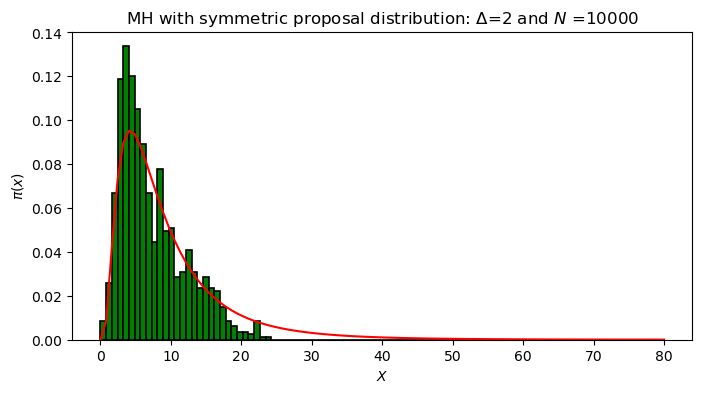

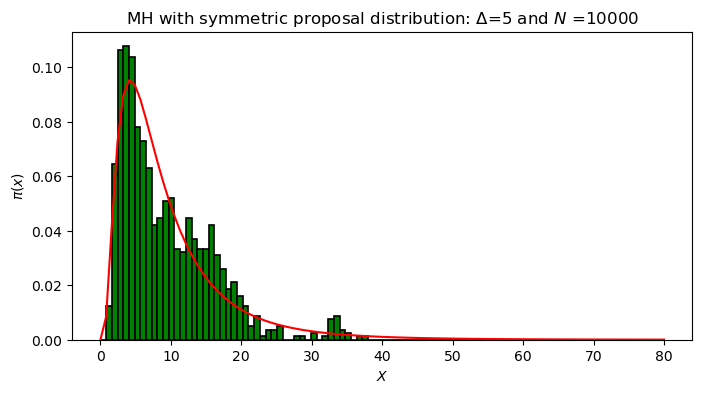

In [11]:
fig_sym_delta2 = plot_samples(ds_symmetric_delta2, delta=2)
fig_sym_delta5 = plot_samples(ds_symmetric_delta5, delta=5)

## Part 2: Using MH to sample from assymetric Target distribution

# Asymmetric proposal distribution


We choose to use **assymetric proposal** distribution in the case of target distribution which is in assymetric.


Suppose we take steps in the **log**-domain instead, i.e. 
$$x^* =  \beta x, ~~~ \beta \in U(\frac{1} {\rho}, \rho)$$

Note that this proposal distribution is asymmetric. The probability that the candidate $x^*$  is in the interval $[x^*, x^* + dx]$ 
when we are at $x$ is given by

$$q(x^* ; x) = \frac{dx}{x(\rho - 1/\rho)}$$

\noindent while the probability that $x$ is the interval $[x, x + dx]$ when we are at $x^*$ is given by

$$q(x ; x^*) = \frac{dx}{x^*(\rho - 1/\rho)}$$


The ratio of the two equals

$$\frac{q(x^* ; x)}{q(x ; x^*)} = \frac{x^*}{x}$$

Going beyond symmetric proposal distributions  makes it possibility to propose bold moves and still have a high acceptance probability.

Note that the candidate $x^*$ will always be accepted if we can find an asymmetric proposal distribution satisfying

$$
\frac{q(x^* ; x)}{q(x ; x^*)} = \frac{\pi(x^*)}{\pi(x)}
$$

\noindent where $\pi$ is the target distribution as usual. 



# Log-normal  distribution

Suppose we want to draw samples from the **log-normal** probability distribution with parameters $\mu = 2.0$ and $\sigma = 0.75$ .

Log-normal distribution is **assymetric** in nature.

$$
p(x ; \mu, \sigma) = \frac{1}{x \sigma \sqrt{2 \pi}} e^{- \frac{(\ln x - \mu)^2}{2 \sigma^2}} ~~~ x > 0
$$

# Asymmetric Proposal

In the case where we want to sample from an asymmetric target distribution such as the log-normal distribution. it is good to use an asymmetric proposal distribution.

Here we use a uniform distribution with varying upper and lower limits.  Where $\rho=1.5$ 
 
$$\beta = U(\frac{1} {\rho}, \rho)$$


To generate a candidate state, we multiply the current state with $\beta$
$$x^* =  \beta x, $$

In [12]:
def asymmetric_proposal_distribution(x_i, rho):
    delta = np.random.uniform(1/rho, rho)  
    return x_i* delta

# MH decision for Asymmetric distribution

Going beyond symmetric proposal distributions makes it possibility to propose bold moves and still have a high acceptance probability.

For **assymetric proposal distrubution** we use the complete acceptance crriteria

$$\alpha_{MH}(\mathbf{x}^{*}; \mathbf{x}_{n} ) =  \min \left\lbrace   1, \dfrac{ \pi(\mathbf{x}^* ) 
q(\mathbf{x}_n ; \mathbf{x}^*)} {\pi(\mathbf{x}_{n})  q(\mathbf{x}^{*} ; \mathbf{x}_n)}\right\rbrace $$

 

In [13]:
def MH_decision_asymmetric(current, proposed, p, q):

    p_current, p_proposed = p(current), p(proposed)
  
    q_current, q_proposed = q(current, rho),q(proposed, rho)
    
    ratio = (p_proposed/p_current) * (q_current/q_proposed)
    
    
    if (ratio >=1):
           return True
    else:
        u = np.random.uniform(0,1)
        return u <= ratio 
    

In [14]:
# Set parameters
delta=2.0
rho=1.5
target_pdf = target_distribution
initial_state=np.random.uniform(1/rho, rho)

# Run the Symmetric sampler

In [15]:
ds_assymetric_delta2 = MH_sampler(target_pdf=target_distribution,proposal_pdf = asymmetric_proposal_distribution,
                                    initial_state=0.6,delta=2,rho=1.5, N=1000,symmetric=False)

ds_assymetric_delta5 = MH_sampler(target_pdf=target_distribution,proposal_pdf = asymmetric_proposal_distribution,
                                    initial_state=0.6,delta=5,rho=1.5, N=1000,symmetric=False)

The percentage of accepted samples is : 90.70 %
The percentage of accepted samples is : 75.90 %


# Plot the target and the histogram

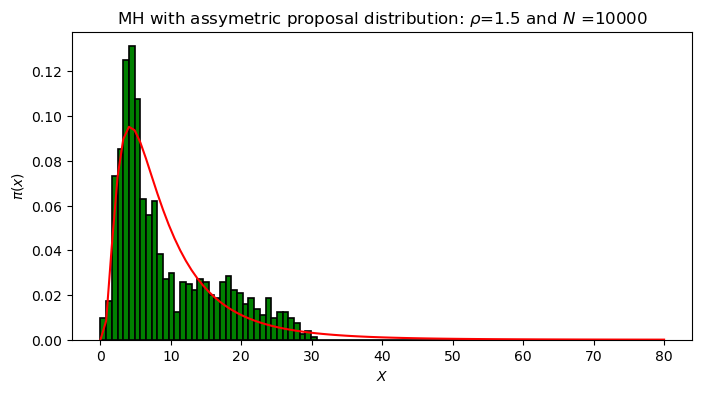

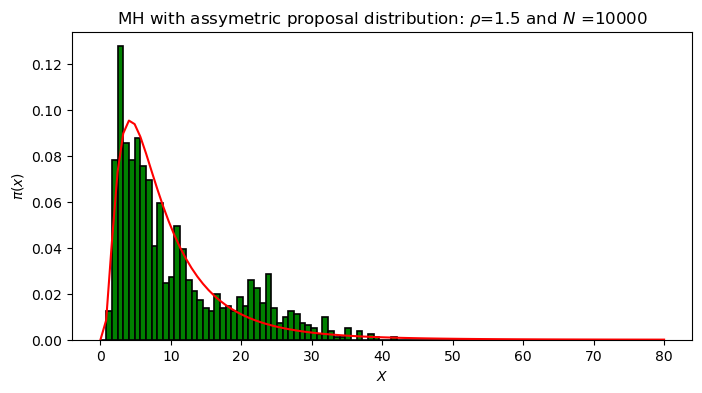

In [16]:
fig_assym = plot_samples(ds_assymetric_delta2, delta=2,symmetric=False)
fig_assym = plot_samples(ds_assymetric_delta5, delta=5,symmetric=False)

In order to be able to use an asymmetric proposal distributions, the Metropolis-Hastings algorithm implements an additional correction factor c, defined from the proposal distribution as


$$ c = \dfrac{ q(\mathbf{x}_n ; \mathbf{x}^*)} {q(\mathbf{x}^{*} ; \mathbf{x}_n)} $$

The correction factor adjusts the transition operator to ensure that the probability of moving from $\mathbf{x}^{*} \rightarrow \mathbf{x}_n$ is equal to the probability of moving from $\mathbf{x}_n \rightarrow \mathbf{x}^{*}$, no matter the proposal distribution.

The Metropolis-Hastings algorithm is implemented with essentially the same procedure as the Metropolis sampler, except that the correction factor is used in the evaluation of acceptance probability \alpha.